#Step2, we chose Top10 articles for each month with the most comment count for further visual analytics. (NLP method from step1 is used again)

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Gdrive file path
file_path = '/content/drive/My Drive/Colab Notebooks/NLP_Visualization/Top10_ProcessedCommentsAll.csv'

# Get the data
df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


<ipython-input-1-1142ce06bf81>:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,articleID,headline,hlwordcount,articleWordCount,commentCount,commentBody,time,cleaned_comments,neg,neu,pos,comments_keywords
0,58e4d28e7c459f24986d87c9,Our Eighth Annual Found Poem Student Contest,7,1385,2374,Alone<br/><br/>Unplugged from society<br/>Pain...,2017-04,AloneUnplugged from societyPainful and iffyIti...,0.115,0.793,0.093,home companionshipsMillions reality strongerTh...
1,58e4d28e7c459f24986d87c9,Our Eighth Annual Found Poem Student Contest,7,1385,2374,"The lone guide,<br/><br/>A barren stretch of d...",2017-04,"The lone guide,A barren stretch of desert,Wait...",0.109,0.891,0.000,guide stretch desert tattooed man minibus peop...
2,58e4d28e7c459f24986d87c9,Our Eighth Annual Found Poem Student Contest,7,1385,2374,"destiny<br/><br/>identity is a struggle,<br/>s...",2017-04,"destinyidentity is a struggle,sometimes you wa...",0.000,0.828,0.172,destinyidentity struggle times crowd notit voi...
3,58e4d28e7c459f24986d87c9,Our Eighth Annual Found Poem Student Contest,7,1385,2374,“Thoughts and Prayers”<br/><br/>Two minutes.<b...,2017-04,“Thoughts and Prayers”Two minutes.Three Shots....,0.000,1.000,0.000,"Thoughts minutes Shots Screams ""Come Blood vio..."
4,58e4d28e7c459f24986d87c9,Our Eighth Annual Found Poem Student Contest,7,1385,2374,Violent response to peaceful protest<br/><br/>...,2017-04,Violent response to peaceful protestYasser Mur...,0.161,0.736,0.102,response Photojournalist life career journalis...


# Part3: Emotional insights from the word clouds.

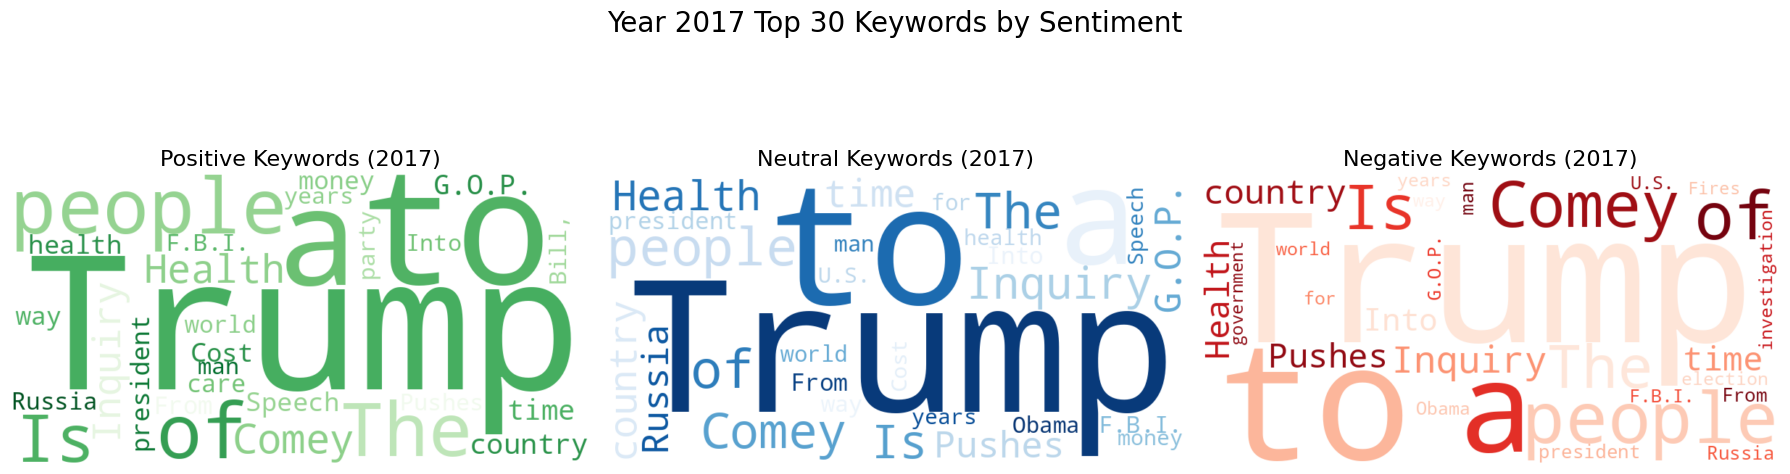

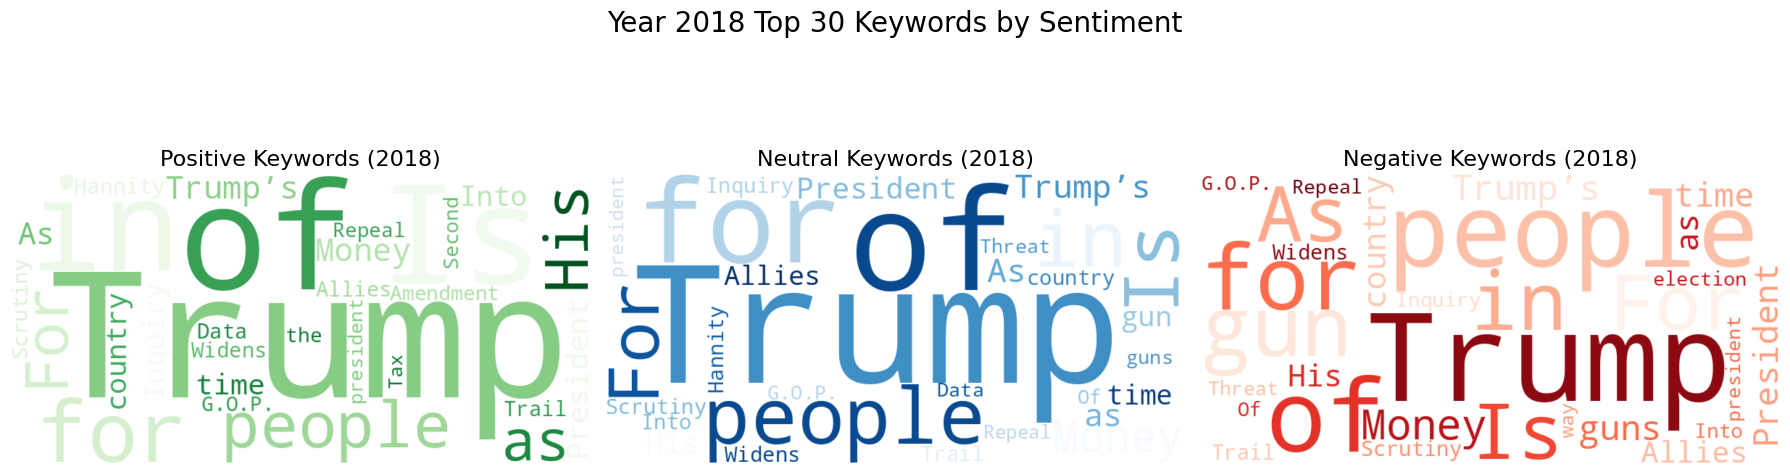

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Data preprocessing
# Extract year from the 'time' column
df['year'] = pd.to_datetime(df['time']).dt.year

# Combine headline and comment keywords
df['all_keywords'] = df['comments_keywords'].fillna('') + ' ' + df['headline'].fillna('')

# Function to create a word frequency dictionary based on sentiment
def get_keywords_by_sentiment(df, year, sentiment_type, top_n=30):
    subset = df[df['year'] == year]
    if sentiment_type == 'positive':
        subset = subset[subset['pos'] > subset['neg']]
    elif sentiment_type == 'negative':
        subset = subset[subset['neg'] > subset['pos']]
    else:  # neutral
        subset = subset[subset['neu'] >= subset[['neg', 'pos']].max(axis=1)]

    # Combine all keywords in the filtered subset
    keywords = ' '.join(subset['all_keywords']).split()
    keyword_freq = Counter(keywords)

    # Select top N keywords
    return dict(keyword_freq.most_common(top_n))

# Plot word clouds for a specific year
def plot_wordclouds(year, top_n=30):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
    sentiments = ['positive', 'neutral', 'negative']
    colors = ['Greens', 'Blues', 'Reds']

    for i, sentiment in enumerate(sentiments):
        keyword_freq = get_keywords_by_sentiment(df, year, sentiment, top_n=top_n)
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap=colors[i]).generate_from_frequencies(keyword_freq)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f"{sentiment.capitalize()} Keywords ({year})", fontsize=16)
        axes[i].axis('off')

    plt.suptitle(f"Year {year} Top {top_n} Keywords by Sentiment", fontsize=20)
    plt.tight_layout()
    plt.show()

# Generate word clouds for 2017 and 2018 with top 20 keywords per sentiment
plot_wordclouds(2017, top_n=30)
plot_wordclouds(2018, top_n=30)


## Image 1: Keyword word cloud of the year based on sentiment intensity
Emotional characteristics of keywords of the year:

## 2017:
Positive keywords: keywords such as “Comey” and “Health” indicate a focus on the positive aspects of health and policy reform.
Neutral keywords: a lot of discussion focused on “Trump” and policy issues (e.g., “Russia”).
Negative keywords: the keywords “Comey” and “Russia” show a strong link to political controversies (e.g. Russiagate).

## 2018:
Positive keywords: the focus shifts to policy descriptions and analyses such as “Is” and “For”, suggesting that the discussion is trending towards the positive side of specific policies.
Neutral keywords: still centered on “Trump” and policy-related words.
Negative keywords: In 2018, the negative sentiment is more focused on “gun” and “people”, which may be related to the gun violence in the United States.
Sentiment distribution changes for keywords:

In 2017, political issues (e.g., the Trump and Comey incidents) ran throughout the year, with sentiment covering all types (positive, neutral, and negative).
In 2018, negative sentiment began to focus more on social issues (e.g., gun violence), while political-related keywords (e.g., Trump) gradually shifted to neutral and analytical discussions.


# In 2017, keyword sentiment reflected political controversies like Trump and Russiagate, while in 2018, focus shifted towards social issues like gun violence, with political keywords becoming more neutral and analytical.

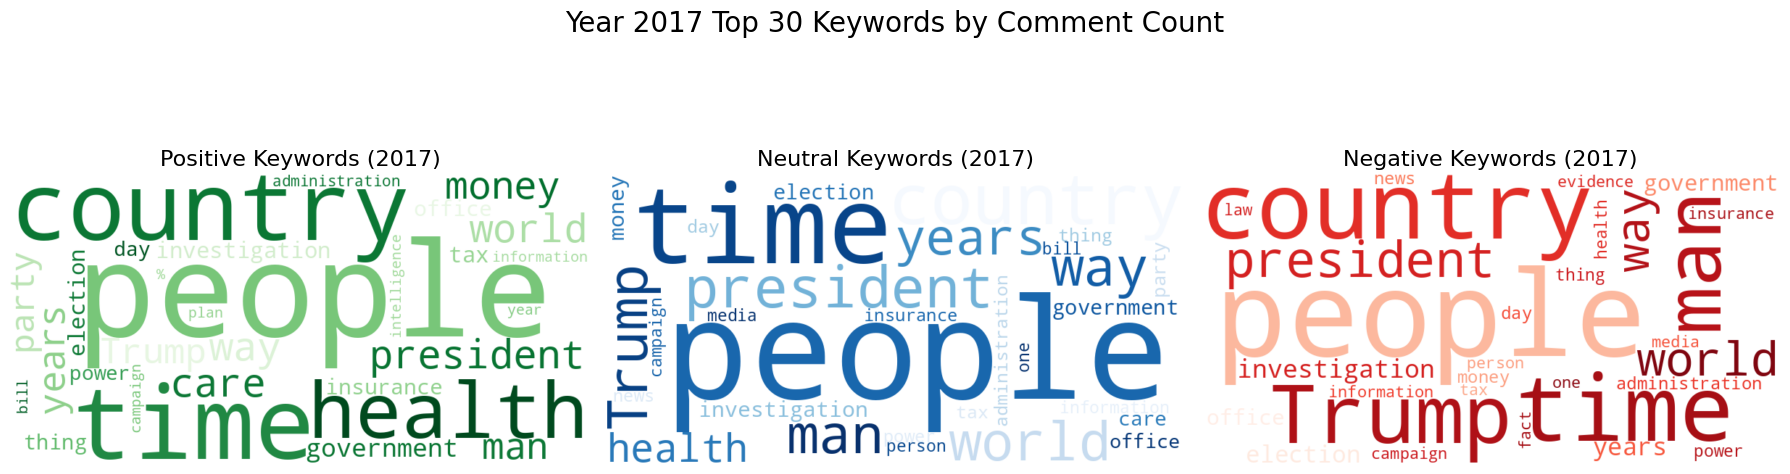

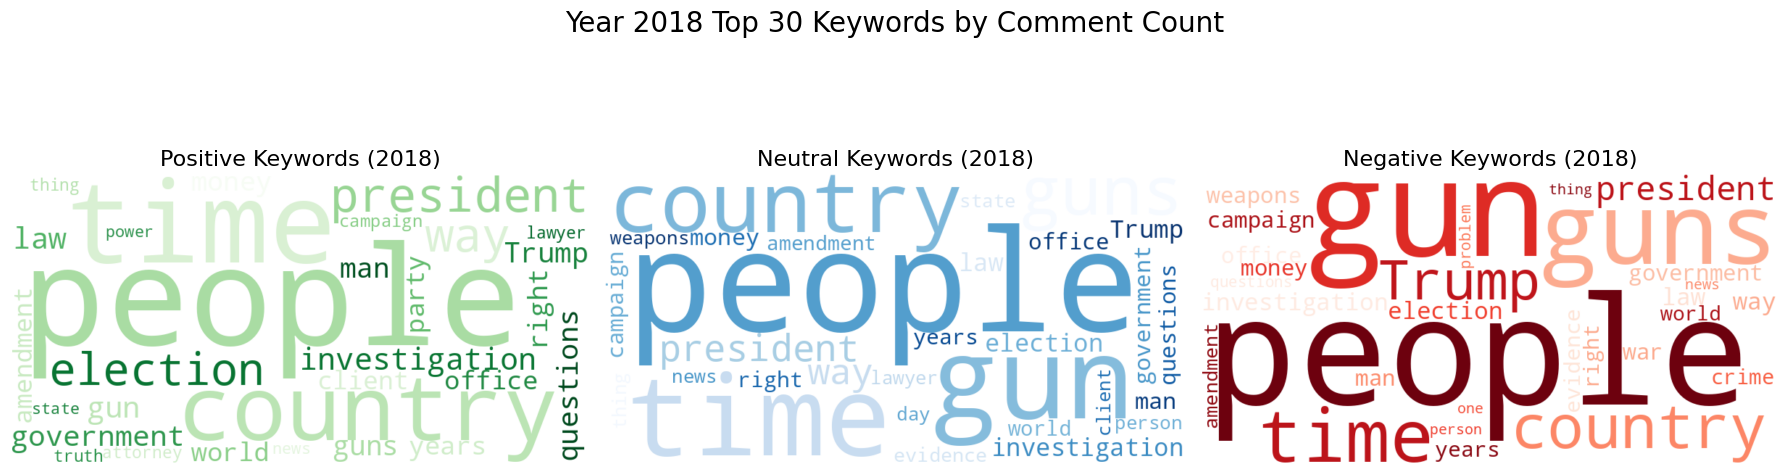

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Data preprocessing
# Extract year from the 'time' column
df['year'] = pd.to_datetime(df['time']).dt.year

# Function to create a word frequency dictionary based on comment count
def get_keywords_by_comment_count(df, year, sentiment_type, top_n=30):
    subset = df[df['year'] == year]
    if sentiment_type == 'positive':
        subset = subset[subset['pos'] > subset['neg']]
    elif sentiment_type == 'negative':
        subset = subset[subset['neg'] > subset['pos']]
    else:  # neutral
        subset = subset[subset['neu'] >= subset[['neg', 'pos']].max(axis=1)]

    # Combine keywords weighted by comment count
    keywords_weighted = Counter()
    for _, row in subset.iterrows():
        keywords = row['comments_keywords'].split() if isinstance(row['comments_keywords'], str) else []
        for keyword in keywords:
            keywords_weighted[keyword] += row['commentCount']  # Weight by comment count

    # Select top N keywords
    return dict(keywords_weighted.most_common(top_n))

# Plot word clouds for a specific year
def plot_wordclouds_by_comment_count(year, top_n=30):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
    sentiments = ['positive', 'neutral', 'negative']
    colors = ['Greens', 'Blues', 'Reds']

    for i, sentiment in enumerate(sentiments):
        keyword_freq = get_keywords_by_comment_count(df, year, sentiment, top_n=top_n)
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap=colors[i]).generate_from_frequencies(keyword_freq)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f"{sentiment.capitalize()} Keywords ({year})", fontsize=16)
        axes[i].axis('off')

    plt.suptitle(f"Year {year} Top {top_n} Keywords by Comment Count", fontsize=20)
    plt.tight_layout()
    plt.show()

# Generate word clouds for 2017 and 2018 with top 30 keywords per sentiment
plot_wordclouds_by_comment_count(2017, top_n=30)
plot_wordclouds_by_comment_count(2018, top_n=30)


## Image 2: Annual Keyword Word Cloud Based on Number of Comments
Keyword trends driven by number of comments:

### 2017:
Positive keywords: Positive discussions with high comment counts continue to be related to policy (e.g., “health”), reflecting the public's expectation of a positive impact of policy.
Neutral keywords: Discussions centered around “people”, “have”, etc., demonstrating the breadth of the discussion and the general neutrality of the attitude.
Negative keywords: “Trump” and the controversial issue of “Russia” are predominantly associated with Trump, indicating that these topics have sparked strong dissatisfaction and discussion.
### 2018:
Positive keywords: focus shifted to “people” and “get”, and discussions became more action-oriented (e.g., access to rights and resources).
Neutral keywords: more comments focused on “gun” (related to gun policy and violence) and “people.”
Negative keywords: Words such as “gun” and “time” indicate greater public dissatisfaction with social security issues.
Year-to-year variation in the number of comments:

In 2017 the discussion was largely focused on political issues (Trump, policy controversies), driving a large number of emotionally charged comments.
In 2018, comments were driven more toward hot-button social issues (e.g., gun issues), with a significantly higher number of negatively-emotional comments.
Synthesizing Conclusions


# In 2017, comments focused on political issues like Trump and policy controversies, while in 2018, the focus shifted to social issues like gun violence, with an increase in negatively charged discussions.

## Based on the distribution of sentiment and comment keywords derived from the above analysis, the following suggestions can be provided for marketable writing to help attract more attention, increase interaction rates, and translate sentiment trends into writing strategies:

### 1. Grasp hot topics and define the target audience
Points to watch:
High-frequency keywords in 2017 centered around political controversies (e.g., Trump, Russiagate, policy reform).
In 2018, it shifted to social hot topics (e.g., gun violence, social security).
Writing Advice:
Focus on the topics that matter most to your target audience by addressing the hot buttons of a specific year. Example:
Politics-related: write analytical articles or controversial discussions (e.g., policy impact interpretation).
Social issues: Write in-depth reports that evoke emotional resonance through real cases and humanistic concerns.
Ensure that the content is contemporary, and be good at correlating article titles with recent hot social events.
### 2. Skillfully use emotions to guide interaction
Observation point:
Negative Sentiment (2017: Trump, 2018: gun issues): negative public sentiment focused on specific controversial events.
Neutral Sentiment (throughout both years): keywords show a general topic of public discussion.
Writing advice:
Resonate: use high-frequency keywords of negative sentiment (e.g., guns, social issues) to write essays that inspire anger or resentment. Example:
Sample headline, “Why is there still no solution to the problem of gun violence?” or “How far is the truth about Russiagate from us?”
Calm Analysis: provides data and facts on neutral sentiment topics to fulfill audience needs for knowledgeable content.
Headline example: “An analysis of the impact of 2022 policy reforms on the average family” or “Gun policy: attitudes and differences by state.”
### 3. headline and keyword precision
Observation:
The keywords “people,” “have,” and “Trump” recur in the number of comments, indicating that these words are highly engaging for users to discuss.
Writing Advice:
Highlight high-frequency keywords in titles and openings to increase click-through rates. Example:
“The Trump administration's new policies: affecting you and your family”
“How to Protect Your Children in the Face of Gun Violence?”
Embed high-frequency keywords into subheadings and paragraph beginnings to optimize SEO (search engine optimization).
### 4. add interactive content to boost user engagement
Observation point:
Peaks in the number of comments correspond to hot events and high emotion topics.
Writing Suggestion:
Add interactive questions to guide reader engagement. Example:
End-of-text question, “How do you think gun policy should change?”
Set up a poll or message campaign, “Russiagate: what findings do you trust?”
Use data charts or examples to give readers specific discussion points.
### 5. topic inserts that focus on positive emotions
Observation point:
Positive sentiment, while relatively low, still plays a role in topics such as health and positive policy impact.
Writing Suggestion:
Implant positive content in mainstream negative sentiment events. Example:
Write solution-oriented content in the context of a policy controversy:
“How can the new health care policy benefit you?”
Tap into positive forces in social issues:
“Positive Developments in Gun Reform: the Rise of Public Power”
### 6. Focusing on Humanizing Narratives to Enhance Emotional Connections
Point of Observation:
The negative emotional word cloud involves “people” and “gun,” indicating a high level of public concern for social safety.
Writing Advice:
Impress the reader with a true story:
“Gun Violence Survivor's Story: How She Faced a New Chapter in Her Life”
“How an Ordinary Family Found Hope in Health Care Reform”
Avoid purely data-driven or hard-hitting expressions and use humanizing narratives to create a deeper emotional connection.
### 7. Long-term trends and future-oriented content
Observations:
The keywords “health,” “gun,” and “people” show the public's concern for ongoing issues.
Writing Advice:
Write predictive and future trend analysis articles that address the audience's concerns about long-term implications. Example:
“How will health care policy affect American lives in the next decade?”
“Trends in Gun Violence: what else do we need to focus on?”

### Examples of Marketable Writing
Here are some article title templates based on the above suggestions:

“What are the key changes coming to U.S. gun policy in 2023?”
“The Trump policy controversy: the long-term impact on the lives of ordinary people”
“How should your family respond under health care reform?”
“Social Security: sharing case studies of gun reform successes”
“Ten things about Trump: truths you may not know”


# Part4: Keywords grouping insights

In [ ]:
import networkx as nx
from collections import Counter
import plotly.graph_objects as go


df['keywords_list'] = df['comments_keywords'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Count keyword frequencies
all_keywords = [kw for keywords in df['keywords_list'] for kw in keywords]
keyword_freq = Counter(all_keywords)

# Select top N keywords by frequency
top_n = 50  # Adjust this value to limit the number of keywords
top_keywords = set([kw for kw, freq in keyword_freq.most_common(top_n)])

# Count co-occurrence only for the top keywords
co_occurrence = Counter()
for keywords in df['keywords_list']:
    filtered_keywords = [kw for kw in keywords if kw in top_keywords]
    for i, kw1 in enumerate(filtered_keywords):
        for kw2 in filtered_keywords[i+1:]:
            co_occurrence[(kw1, kw2)] += 1

# Create the graph
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight > 5:  # Set a threshold for minimum co-occurrence
        G.add_edge(kw1, kw2, weight=weight)

# Create positions for nodes
pos = nx.spring_layout(G)

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Extract node positions, sizes, and text
node_x = []
node_y = []
node_size = []
node_text = []
text_size = []  # To control text font size

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    freq = keyword_freq[node]
    node_size.append(max(10, freq * 20 / max(keyword_freq.values())))  # Set minimum node size to 10
    text_size.append(max(12, freq * 30 / max(keyword_freq.values())))  # Set minimum text size to 12
    node_text.append(node)  # Display keyword text on nodes

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',  # Add text to the nodes
    marker=dict(
        size=node_size,  # Node size based on frequency with a minimum
        color='blue',
        line_width=2
    ),
    text=node_text,  # The text to display
    textfont=dict(size=text_size, color='black'),  # Text size with a minimum value
    textposition="middle center",  # Position text at the center of the node
    hoverinfo='text'
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Keyword Co-occurrence Network (Top 50 Keywords)",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40)
                ))
fig.show()


2D Keyword Co-occurrence Network Analysis

The dense structure reveals interconnected discussions on themes like "election," "law," and "democracy," showing the public's holistic interest in fairness, transparency, and governance mechanisms.

In [ ]:
import networkx as nx
from collections import Counter
import plotly.graph_objects as go


df['keywords_list'] = df['comments_keywords'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Count keyword frequencies
all_keywords = [kw for keywords in df['keywords_list'] for kw in keywords]
keyword_freq = Counter(all_keywords)

# Select top N keywords by frequency
top_n = 50  # Adjust this value to limit the number of keywords
top_keywords = set([kw for kw, freq in keyword_freq.most_common(top_n)])

# Count co-occurrence only for the top keywords
co_occurrence = Counter()
for keywords in df['keywords_list']:
    filtered_keywords = [kw for kw in keywords if kw in top_keywords]
    for i, kw1 in enumerate(filtered_keywords):
        for kw2 in filtered_keywords[i+1:]:
            co_occurrence[(kw1, kw2)] += 1

# Create the graph
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight > 10:  # Increase the threshold for minimum co-occurrence
        G.add_edge(kw1, kw2, weight=weight)

# Create 3D positions for nodes using a better layout algorithm
pos_3d = nx.kamada_kawai_layout(G, dim=3)  # Better for 3D distribution

# Extract edge positions
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=0.5, color='lightgray', dash='dot'),  # Use dashed, light-colored lines
    hoverinfo='none',
    mode='lines'
)

# Extract node positions, sizes, colors, and text
node_x = []
node_y = []
node_z = []
node_size = []
node_text = []
node_color = []
text_size = []  # Adjust text size

for node in G.nodes():
    x, y, z = pos_3d[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    freq = keyword_freq[node]
    node_size.append(freq * 15 / max(keyword_freq.values()))  # Scale node size by frequency
    node_text.append(f"{node}: {freq}")
    node_color.append(freq)  # Use frequency to determine color intensity
    text_size.append(max(10, freq * 20 / max(keyword_freq.values())))  # Ensure minimum text size is 10

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(
        size=node_size,  # Node size based on frequency
        color=node_color,  # Use frequency to color nodes
        colorscale='Viridis',  # A visually appealing color scale
        opacity=0.8,  # Reduce opacity to improve visualization
        showscale=True,  # Show color scale legend
        colorbar=dict(
            title="Keyword Frequency",
            x=1.05
        )
    ),
    text=[node for node in G.nodes()],  # Display keyword text
    textfont=dict(size=text_size, color='black'),  # Adjust text size with a minimum value
    textposition="middle center",
    hoverinfo='text'
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="3D Keyword Co-occurrence Network (Top 50 Keywords)",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(l=0, r=0, t=40, b=0),
                    scene=dict(
                        xaxis=dict(title="X-axis"),
                        yaxis=dict(title="Y-axis"),
                        zaxis=dict(title="Z-axis")
                    )
                ))
fig.show()

import plotly.io as pio  # Import plotly.io for saving the HTML

# Save the figure as an HTML file
#output_file = "3D_Keyword_Cooccurrence_Network.html"
#pio.write_html(fig, file=output_file, auto_open=False)

#print(f"Interactive 3D plot saved as {output_file}")


3D Keyword Co-occurrence Network Visualization

The 3D network highlights "people" as the central keyword, reflecting the public's primary concern with policies affecting lives, with strong connections to "government," "country," and "president," underscoring interest in governance and national policies.

### Core keywords highlight public concerns
people ”is the central node in the network, indicating a high level of public interest in the impact of policies on people's lives. The structure of the keyword network suggests that the discussion revolves around “people”, covering core themes such as equity, rights and social welfare.
Other high-frequency keywords, such as “government”, “country”, and “president”, emphasize the public's broader interest in governance and policies at the national level. The close association of these words reflects the general discussion on the effectiveness of government policy implementation and governance.

### Sub-themes are diverse and hierarchical
Sub-themes such as “election”, “law”, “democracy”, and “investigation” suggest that the public is not only concerned with core governance issues, but also with specific institutional events and procedural issues.
“election” and ‘law’ imply interest in election fairness, law reform, and law enforcement; ‘media’, ‘press’, and ‘investigation’ may be related to the ongoing public discussion of information transparency and investigation of political events.

###Strong associations between keywords
Strong associations between the core word “people” and the words “government”, “law” and “election” suggest that the discussion focuses on how policies affect people's livelihoods, the fairness of the election process, and the significance of legal reforms for the social fabric.
Keywords such as “democracy” and “party” demonstrate the public's broader interest in political mechanisms and the distribution of power.

### Dense network structure reveals public thinking patterns
The high density of network structure indicates that the public discussion is centralized and coherent. Strong connections between discussion points mean that hot topics are often not independent but interrelated. For example, the connection between “election” and “law” and “democracy” suggests that the public closely associates election mechanisms, legal frameworks and the operation of democracy.

### Gradual Focusing of Public Attention
The core keywords and peripheral sub-keywords show the hierarchical nature of the public's concern: from the broad theme of “people” to specific events such as “election” and “law reform”, to the institutional issues related to social mechanisms. The hierarchical nature of the network reflects the depth and breadth of the discussion, from broad themes such as “people” to specific events such as “elections” and “legal reform”, to institutional issues related to social mechanisms.

###The hierarchical relationship of the network reflects the diffusion of hotspots in the discussion.
Sub-keywords such as “media” and “investigation” that radiate outward from the core keywords indicate that the public discussion is not only limited to the policy itself, but also includes the public opinion and operational aspects related to the dissemination and implementation of the policy.

## Marketable Writing Advice

### Develop in-depth content around core keywords

Write in-depth articles on how policies affect people's lives, such as social welfare and tax policies, for keywords like “people” and “government.”
Example title:
“People and policy: how does reform change our lives?”
“The bond between government and people: the distance from policy to practice”

###Use sub-themes as entry points to explore specific events

For “ELECTION” and “LAW,” write feature articles that focus on the public's major concerns about election fairness and law reform.
Sample title:
“Election fairness: victory or challenge for the system?”
“Behind law reform: key changes we need to understand”

### Explaining Complex Topics through Keyword Relationship Maps

Use network diagrams to reveal correlations between keywords and create visualizations to enhance the appeal of the article.
Example title:
“Five central points of election controversy from a keyword network”
“Graphic: why are the people at the center of the discussion?”

### Combine storytelling techniques to inspire emotional resonance

Demonstrate how policies actually affect individuals through real-life examples or emotional stories that incorporate the keywords “people” and “government.”
Example headline:
“Personal stories from policy reform: when laws change lives”
“The Real Impact of Policy as Seen in a Day in the Life of an Ordinary Person”

### Create interactive content to engage readers

Target keywords that are intensively discussed (e.g., “election”, “democracy”) and guide users to participate through polls, questionnaires, etc.
Example headline:
“What do you think is the biggest challenge of the election? Participate in our discussion!”
“Core issues of democracy: what's your opinion?”

###Use keyword diversity to write about broad topics

Combine secondary keywords (e.g., “media”, “investigation”) to write articles that explore the public's perception of journalistic transparency, media influence, and opinion direction.
Sample title:
“How important is the role of the media in political transparency?”
“The Power of Opinion: How Do Investigations Affect Public Perception?”

# Futher neural network analysis is embedded in our prototype. Details is explained in the video demonstration.

# Final Project Conclusions
Based on the project's objectives, progress, and the provided documents, here are the summarized conclusions:


## Key Findings
###Emotional Analysis of Reader Comments:

The project successfully integrated machine learning and visual analytics to analyze New York Times articles and their comments.

###Sentiment Trends:
Political articles generated predominantly negative or neutral sentiments, reflecting polarized or subdued reactions.
Lifestyle and sports articles elicited more positive sentiments, often associated with joy or excitement.

##Keyword Insights:
High-frequency keywords such as "Trump," "country," and "people" were central to discussions, particularly for political topics.
Emotion-laden keywords varied significantly across topics, demonstrating the importance of context in sentiment analysis.

###Reader Engagement Insights:

Longer comments or those with more recommendations tended to express stronger emotions, showcasing a correlation between engagement level and emotional intensity.
Articles with higher word counts often prompted more detailed and sentiment-rich comments, suggesting that content depth influences reader reactions.

###Visualizations and Data-Driven Insights:

The project implemented advanced visualizations, such as:
3D sentiment scatter plots showing sentiment trends over time.
Keyword co-occurrence networks highlighting relationships among discussion topics.
Dynamic word clouds revealing shifts in emotional keywords across different periods.
These visualizations effectively uncovered hidden patterns, enabling intuitive understanding of complex emotional responses.


## Comparison of Analysis Methods:

TF-IDF, spacey and LLM-based approaches provided complementary insights. While TF-IDF and spacey identified frequency and emotion of the keywords, LLMs offered nuanced sentiment predictions, suggesting the potential for hybrid methodologies.

###Trends Over Time:

Sentiment trends evolved between 2017 and 2018. Political sentiments in 2018 showed increased negativity, potentially linked to specific events like the midterm elections or policy debates.
Articles in categories such as technology and health exhibited consistent engagement and emotional reactions, indicating ongoing public interest.
Market-Driven Recommendations


##Content Strategy:

Focus on producing detailed articles in lifestyle and health sections, as they consistently evoke positive engagement.
Strategically address polarizing topics (e.g., politics) with balanced narratives to reduce potential negativity in audience reactions.
Interactive Dashboards for Media Outlets:

Implement real-time sentiment monitoring tools to gauge immediate reader responses to published content, aiding in responsive editorial planning.
Utilize keyword-emotion matrices to refine headlines and article summaries, optimizing for emotional resonance.
Enhanced Personalization:

Leverage sentiment insights to create personalized reader experiences. For instance, recommending positively received content for neutral readers or less polarizing articles for those reacting negatively.


##Future NLP Innovations:

Extend the analysis to include multimodal data (e.g., images, videos) for a comprehensive understanding of audience reactions.
Invest in predictive modeling to forecast the reception of future articles, aligning with reader preferences and market trends.
Project Impact
The project underscores the value of integrating machine learning and visual analytics in understanding reader sentiments. It provides actionable insights for media outlets to enhance content quality, optimize audience engagement, and adapt to evolving market demands. The combination of cutting-edge visualization and NLP techniques ensures that the findings are accessible and directly applicable to decision-making in the competitive media landscape.






